In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# processing


In [36]:
df = pd.read_csv('../data/raw/bank_churn.csv')

print(f"Dataset: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\nAperçu:")
df.head()

Dataset: 10000 lignes, 13 colonnes

Aperçu:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# Afficher toutes les colonnes
print("Colonnes disponibles:")
print(df.columns.tolist())

print("\n" + "="*50)
print("\nTypes de données:")
print(df.dtypes)

Colonnes disponibles:
['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn']


Types de données:
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object


In [38]:
# Liste des colonnes à supprimer
columns_to_drop = ['CustomerId', 'Surname']

# Créer une copie du dataframe pour le preprocessing
df_clean = df.drop(columns=columns_to_drop)

print(f"Colonnes supprimées: {columns_to_drop}")
print(f"\nNouvelle shape: {df_clean.shape}")
print(f"\nColonnes restantes: {df_clean.columns.tolist()}")

Colonnes supprimées: ['CustomerId', 'Surname']

Nouvelle shape: (10000, 11)

Colonnes restantes: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn']


In [39]:
# Voir les valeurs uniques des variables catégorielles
print("Valeurs de Geography:")
print(df_clean['Geography'].unique())
print(f"Nombre: {df_clean['Geography'].nunique()}")

print("\n" + "="*50)

print("\nValeurs de Gender:")
print(df_clean['Gender'].unique())
print(f"Nombre: {df_clean['Gender'].nunique()}")

Valeurs de Geography:
['France' 'Spain' 'Germany']
Nombre: 3


Valeurs de Gender:
['Female' 'Male']
Nombre: 2


In [40]:
# Label Encoding pour Gender (binaire)
# Male = 0, Female = 1
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

print("Gender encodé:")
print(df_clean['Gender'].value_counts())
print("\nVérification:")
print(df_clean[['Gender']].head(10))

Gender encodé:
Gender
0    5457
1    4543
Name: count, dtype: int64

Vérification:
   Gender
0       1
1       1
2       1
3       1
4       1
5       0
6       0
7       1
8       0
9       0


In [41]:
# Copier le DF nettoyé
df_encoded = df_clean.copy()

# Encoder la colonne Geography
df_encoded = pd.get_dummies(df_encoded, columns=['Geography'], prefix='Geography')

# Colonnes dummies créées
geography_cols = ['Geography_France', 'Geography_Germany', 'Geography_Spain']

# Convertir en int
for col in geography_cols:
    df_encoded[col] = df_encoded[col].astype(int)

print("Geography converti en 0/1:")
print(df_encoded[geography_cols].head())

print("\n" + "="*50)
print(f"Shape finale: {df_encoded.shape}")
print(f"Colonnes: {df_encoded.columns.tolist()}")


Geography converti en 0/1:
   Geography_France  Geography_Germany  Geography_Spain
0                 1                  0                0
1                 0                  0                1
2                 1                  0                0
3                 1                  0                0
4                 0                  0                1

Shape finale: (10000, 13)
Colonnes: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


In [42]:
df_encoded.head(10)

,CreditScore,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [43]:
# Vérifier qu'il ne reste plus de colonnes texte
print("Types de données:")
print(df_encoded.dtypes)

print("\n" + "="*50)
print("\nColonnes non-numériques (devrait être vide):")
non_numeric = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(non_numeric if non_numeric else "Aucune - Tout est encodé !")

Types de données:
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
Num Of Products        int64
Has Credit Card        int64
Is Active Member       int64
Estimated Salary     float64
Churn                  int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object


Colonnes non-numériques (devrait être vide):
Aucune - Tout est encodé !


In [44]:
# Séparer les features (X) de la target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("Features (X):")
print(f"Shape: {X.shape}")
print(f"Colonnes: {X.columns.tolist()}")

print("\n" + "="*50)

print("\nTarget (y):")
print(f"Shape: {y.shape}")
print(f"Distribution:")
print(y.value_counts())
print(f"\nPourcentages:")
print(y.value_counts(normalize=True) * 100)

Features (X):
Shape: (10000, 12)
Colonnes: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


Target (y):
Shape: (10000,)
Distribution:
Churn
0    7963
1    2037
Name: count, dtype: int64

Pourcentages:
Churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [45]:
# Séparer en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% pour le test
    random_state=42,    # Pour reproductibilité
    stratify=y          # Garde la même proportion 80/20 dans train et test
)

print("Split Train/Test effectué:")
print(f"\nTrain set:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  Distribution y_train: {y_train.value_counts(normalize=True).values}")

print(f"\nTest set:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  Distribution y_test: {y_test.value_counts(normalize=True).values}")


Split Train/Test effectué:

Train set:
  X_train: (8000, 12)
  y_train: (8000,)
  Distribution y_train: [0.79625 0.20375]

Test set:
  X_test: (2000, 12)
  y_test: (2000,)
  Distribution y_test: [0.7965 0.2035]


In [46]:
from imblearn.over_sampling import SMOTE

# Créer l'objet SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur le train uniquement
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Avant SMOTE (Train):")
print(f"  Shape: {X_train.shape}")
print(f"  Distribution: {y_train.value_counts().to_dict()}")

print("\n" + "="*50)

print("\nAprès SMOTE (Train):")
print(f"  Shape: {X_train_balanced.shape}")
print(f"  Distribution: {y_train_balanced.value_counts().to_dict()}")

print("\n" + "="*50)

print("\nTest (inchangé):")
print(f"  Shape: {X_test.shape}")
print(f"  Distribution: {y_test.value_counts().to_dict()}")

Avant SMOTE (Train):
  Shape: (8000, 12)
  Distribution: {0: 6370, 1: 1630}


Après SMOTE (Train):
  Shape: (12740, 12)
  Distribution: {1: 6370, 0: 6370}


Test (inchangé):
  Shape: (2000, 12)
  Distribution: {0: 1593, 1: 407}


In [47]:
import joblib

# Sauvegarder les datasets
joblib.dump(X_train_balanced, '../data/processed/X_train.pkl')
joblib.dump(y_train_balanced, '../data/processed/y_train.pkl')
joblib.dump(X_test, '../data/processed/X_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

# Sauvegarder aussi les noms de colonnes (utile pour plus tard)
feature_names = X_train_balanced.columns.tolist()
joblib.dump(feature_names, '../data/processed/feature_names.pkl')

print("Données sauvegardées dans data/processed/")
print(f"  X_train: {X_train_balanced.shape}")
print(f"  y_train: {y_train_balanced.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  Features: {len(feature_names)} colonnes")


Données sauvegardées dans data/processed/


  X_train: (12740, 12)
  y_train: (12740,)
  X_test: (2000, 12)
  y_test: (2000,)
  Features: 12 colonnes


# Entrainement


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Modèle 1: Logistic Regression
print("Entraînement Logistic Regression...")

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train_balanced)

# Prédictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Évaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

print(f"\nLogistic Regression:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  ROC-AUC: {roc_auc_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Reste (0)', 'Part (1)']))

Entraînement Logistic Regression...

Logistic Regression:
  Accuracy: 0.7730
  ROC-AUC: 0.7447

Classification Report:
              precision    recall  f1-score   support

   Reste (0)       0.86      0.85      0.86      1593
    Part (1)       0.45      0.47      0.46       407

    accuracy                           0.77      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.77      0.78      2000



In [51]:
# Modèle 2: Random Forest
print("Entraînement Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=100,    # 100 arbres
    random_state=42,
    n_jobs=-1            # Utilise tous les CPU
)
rf_model.fit(X_train_scaled, y_train_balanced)

# Prédictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

print(f"\nRandom Forest:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  ROC-AUC: {roc_auc_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Reste (0)', 'Part (1)']))

Entraînement Random Forest...

Random Forest:
  Accuracy: 0.8380
  ROC-AUC: 0.8395

Classification Report:
              precision    recall  f1-score   support

   Reste (0)       0.90      0.90      0.90      1593
    Part (1)       0.60      0.59      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [52]:
# Modèle 3: XGBoost
print("Entraînement XGBoost...")

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train_balanced)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Évaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

print(f"\nXGBoost:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  ROC-AUC: {roc_auc_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Reste (0)', 'Part (1)']))

Entraînement XGBoost...

XGBoost:
  Accuracy: 0.8365
  ROC-AUC: 0.8569

Classification Report:
              precision    recall  f1-score   support

   Reste (0)       0.90      0.89      0.90      1593
    Part (1)       0.59      0.62      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



Comparaison des modèles:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression    0.7730  0.744700
1        Random Forest    0.8380  0.839505
2              XGBoost    0.8365  0.856919


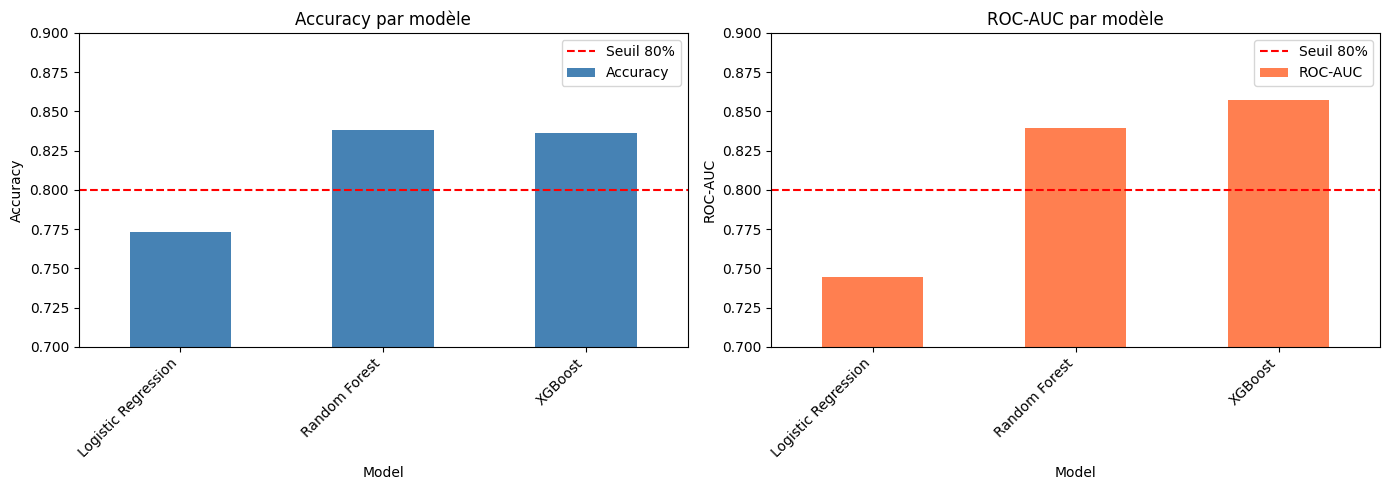

In [53]:
import pandas as pd

# Créer un dataframe de comparaison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_xgb]
})

print("Comparaison des modèles:")
print(results)

# Graphique de comparaison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Accuracy
results.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0], legend=False, color='steelblue')
axes[0].set_title('Accuracy par modèle')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.9])
axes[0].axhline(y=0.8, color='red', linestyle='--', label='Seuil 80%')
axes[0].legend()
axes[0].set_xticklabels(results['Model'], rotation=45, ha='right')

# Graphique 2: ROC-AUC
results.plot(x='Model', y='ROC-AUC', kind='bar', ax=axes[1], legend=False, color='coral')
axes[1].set_title('ROC-AUC par modèle')
axes[1].set_ylabel('ROC-AUC')
axes[1].set_ylim([0.7, 0.9])
axes[1].axhline(y=0.8, color='red', linestyle='--', label='Seuil 80%')
axes[1].legend()
axes[1].set_xticklabels(results['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

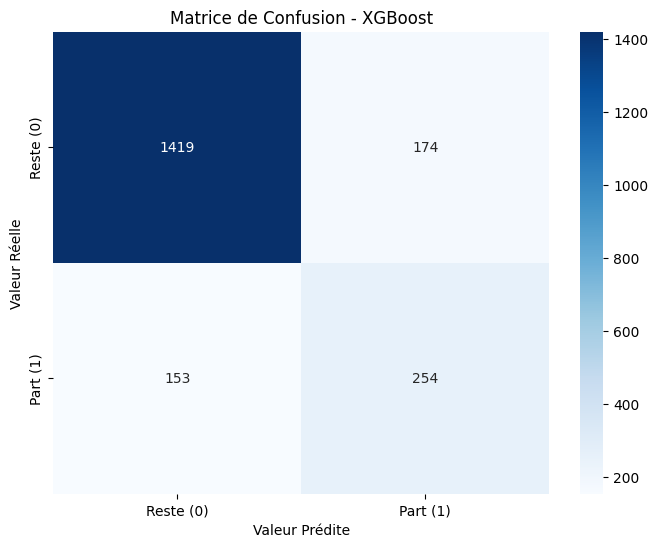


Analyse détaillée:
Vrais Négatifs (TN): 1419 - Clients restés correctement identifiés
Faux Positifs (FP): 174 - Clients restés prédits comme partants (fausse alarme)
Faux Négatifs (FN): 153 - Clients partis manqués par le modèle (PROBLEME)
Vrais Positifs (TP): 254 - Clients partis correctement détectés (OBJECTIF)


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion pour XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Reste (0)', 'Part (1)'],
            yticklabels=['Reste (0)', 'Part (1)'])
plt.title('Matrice de Confusion - XGBoost')
plt.ylabel('Valeur Réelle')
plt.xlabel('Valeur Prédite')
plt.show()

# Analyse détaillée
tn, fp, fn, tp = cm.ravel()
print("\nAnalyse détaillée:")
print(f"Vrais Négatifs (TN): {tn} - Clients restés correctement identifiés")
print(f"Faux Positifs (FP): {fp} - Clients restés prédits comme partants (fausse alarme)")
print(f"Faux Négatifs (FN): {fn} - Clients partis manqués par le modèle (PROBLEME)")
print(f"Vrais Positifs (TP): {tp} - Clients partis correctement détectés (OBJECTIF)")

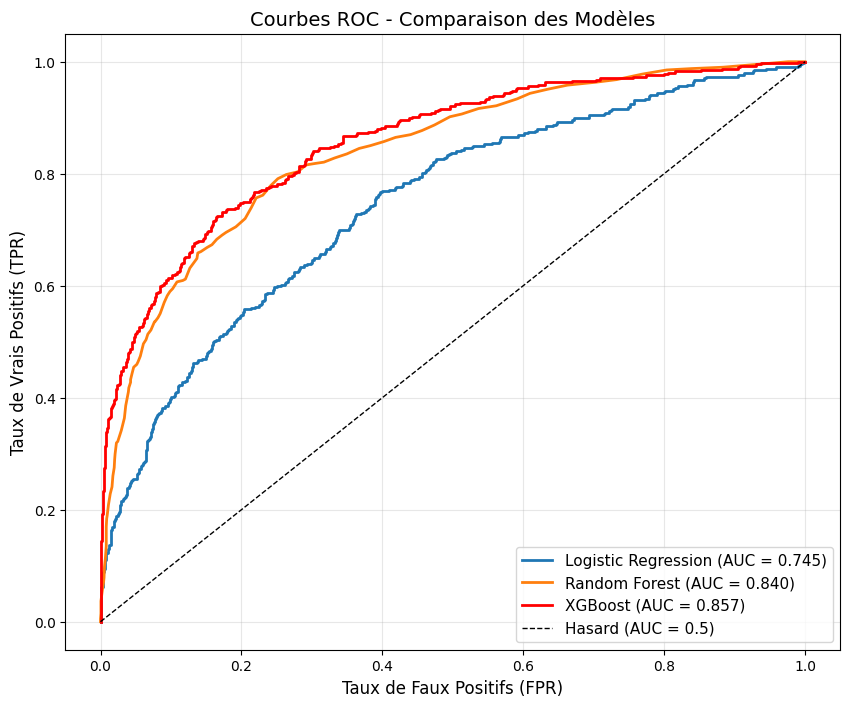

In [55]:
from sklearn.metrics import roc_curve, auc

# Calculer les courbes ROC pour chaque modèle
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

# Visualisation
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', linewidth=2, color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.5)', linewidth=1)

plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.show()


Top 10 features les plus importantes:
              Feature  Importance
7    Is Active Member    0.270309
10  Geography_Germany    0.200160
11    Geography_Spain    0.115665
2                 Age    0.111570
9    Geography_France    0.091400
5     Num Of Products    0.086644
6     Has Credit Card    0.047670
4             Balance    0.029362
3              Tenure    0.014586
8    Estimated Salary    0.012122
1              Gender    0.010555
0         CreditScore    0.009956


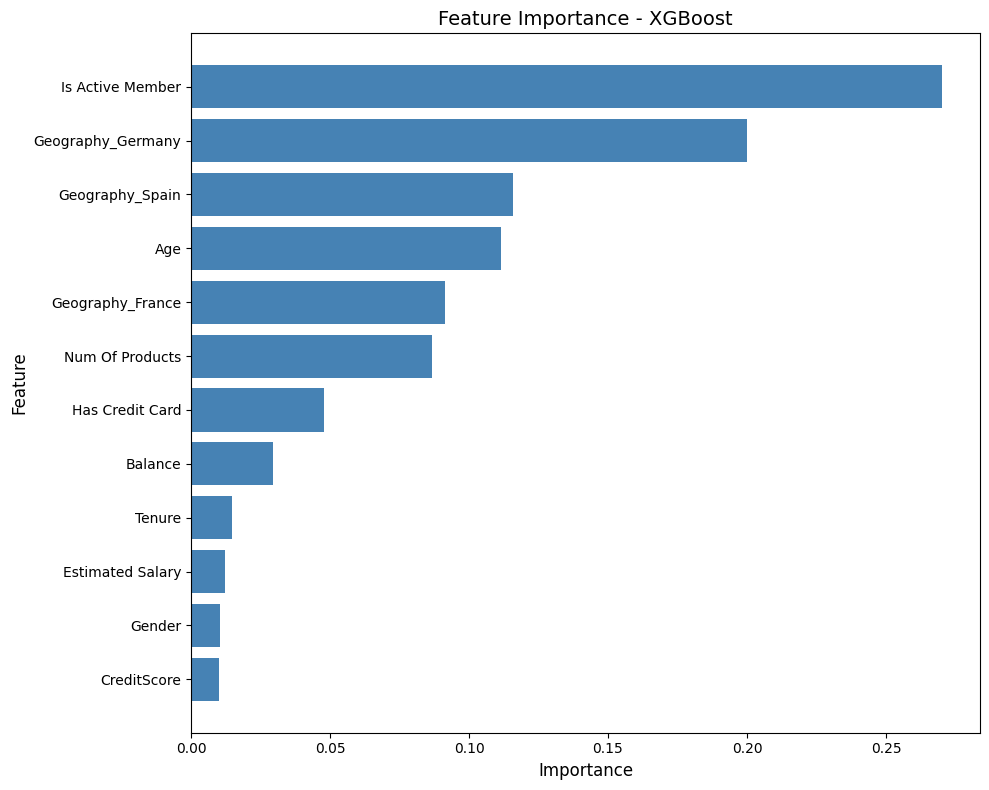

In [58]:
# Extraire l'importance des features de XGBoost
feature_importance = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 features les plus importantes:")
print(feature_importance)

# Visualisation
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - XGBoost', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [60]:
# Sauvegarder le modèle XGBoost
joblib.dump(xgb_model, '../models/xgboost_churn_model.pkl')

# Sauvegarder aussi les métadonnées
model_info = {
    'model_name': 'XGBoost',
    'accuracy': accuracy_xgb,
    'roc_auc': roc_auc_xgb,
    'recall_class_1': 0.62,
    'precision_class_1': 0.59,
    'features': X_train_balanced.columns.tolist(),
    'training_date': '2025-10-25',
    'n_train_samples': len(X_train_scaled),
    'n_test_samples': len(X_test_scaled)
}

joblib.dump(model_info, '../models/model_info.pkl')

print("Modèle XGBoost sauvegardé:")
print(f"  Fichier: models/xgboost_churn_model.pkl")
print(f"  ROC-AUC: {roc_auc_xgb:.4f}")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"\nMétadonnées sauvegardées dans: models/model_info.pkl")

Modèle XGBoost sauvegardé:
  Fichier: models/xgboost_churn_model.pkl
  ROC-AUC: 0.8569
  Accuracy: 0.8365

Métadonnées sauvegardées dans: models/model_info.pkl


In [61]:
# Vérifier qu'on peut bien recharger le modèle
loaded_model = joblib.load('../models/xgboost_churn_model.pkl')
loaded_info = joblib.load('../models/model_info.pkl')

# Test de prédiction
test_prediction = loaded_model.predict(X_test_scaled[:5])

print("Test de chargement du modèle:")
print(f"Modèle chargé: {type(loaded_model)}")
print(f"\nPrédictions sur 5 premiers clients test:")
print(f"  Prédictions: {test_prediction}")
print(f"  Valeurs réelles: {y_test[:5].values}")

print(f"\nInfos du modèle chargées:")
for key, value in loaded_info.items():
    if key != 'features':
        print(f"  {key}: {value}")

Test de chargement du modèle:
Modèle chargé: <class 'xgboost.sklearn.XGBClassifier'>

Prédictions sur 5 premiers clients test:
  Prédictions: [0 0 0 0 0]
  Valeurs réelles: [0 0 0 0 0]

Infos du modèle chargées:
  model_name: XGBoost
  accuracy: 0.8365
  roc_auc: 0.856918551833806
  recall_class_1: 0.62
  precision_class_1: 0.59
  training_date: 2025-10-25
  n_train_samples: 12740
  n_test_samples: 2000
